In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta
from icecream import ic

In [2]:
# Define the time range and frequency
start_time = datetime.now()
end_time = start_time + timedelta(hours=12)
time_range = pd.date_range(start=start_time, end=end_time, freq='S')


In [3]:
len(time_range)

43201

In [4]:
# Initialize lists to store the data
casting_speed = []
sen_depth = []
tundish_temp = []
cooling_water_flow = []
cooling_water_pressure = []
vibration_frequency = []
vibration_amplitude = []
mold_level = []
casting_speed_label = []
mold_level_label = []
sen_depth_label = []
tundish_temp_label = []

# Control target values and ranges
control_targets = {
    'casting_speed': 0.59,
    'mold_level': 85,
    'sen_depth': 120,
    'tundish_temp': 1488
}
ranges = {
    'casting_speed': (0.57, 0.61),
    'mold_level': (82, 88),
    'sen_depth': (110, 130),
    'tundish_temp': (1481, 1496)
}

# Generate data for each second in the time range
for _ in time_range:
    casting_speed.append(np.random.normal(control_targets['casting_speed'], 0.01))
    sen_depth.append(np.random.normal(control_targets['sen_depth'], 1))
    tundish_temp.append(np.random.normal(control_targets['tundish_temp'], 1))
    cooling_water_flow.append(np.random.uniform(100, 500))
    cooling_water_pressure.append(np.random.uniform(1, 5))
    vibration_frequency.append(50)  # Constant value
    vibration_amplitude.append(0.1)  # Constant value
    mold_level.append(np.random.normal(control_targets['mold_level'], 1))
    casting_speed_label.append('normal')
    mold_level_label.append('normal')
    sen_depth_label.append('normal')
    tundish_temp_label.append('normal')


In [5]:
def introduce_anomalies(data, labels, variable, anomaly_type, min_val, max_val):
    if anomaly_type == 'impulse':
        index = random.randint(0, len(data) - 1)
        data[index] = np.random.uniform(min_val, max_val)
        labels[index] = 'impulse'
    elif anomaly_type == 'step':
        start_index = random.randint(0, len(data) - 1000)
        step_value = np.random.uniform(min_val, max_val)
        for i in range(start_index, start_index + 1000):
            data[i] = step_value
            labels[i] = 'step'
    elif anomaly_type == 'slow-varying':
        start_index = random.randint(0, len(data) - 1000)
        for i in range(start_index, start_index + 1000):
            data[i] = np.random.uniform(min_val, max_val)
            labels[i] = 'slowvarying'

In [6]:
# Introduce anomalies in the data
for variable in ['casting_speed', 'mold_level', 'sen_depth', 'tundish_temp']:
    for anomaly_type in ['impulse', 'step', 'slow-varying']:
        introduce_anomalies(locals()[variable], locals()[f'{variable}_label'], variable, anomaly_type, ranges[variable][0], ranges[variable][1])

In [7]:
data = {
    'Timestamp': time_range,
    'Casting_Speed': casting_speed,
    'SEN_Depth': sen_depth,
    'Tundish_Temperature': tundish_temp,
    'Cooling_Water_Flow': cooling_water_flow,
    'Cooling_Water_Pressure': cooling_water_pressure,
    'Vibration_Frequency': vibration_frequency,
    'Vibration_Amplitude': vibration_amplitude,
    'Mold_Level': mold_level,
    'Casting_Speed_Label': casting_speed_label,
    'Mold_Level_Label': mold_level_label,
    'SEN_Depth_Label': sen_depth_label,
    'Tundish_Temperature_Label': tundish_temp_label
}
df = pd.DataFrame(data)


In [8]:
df

,Timestamp,Casting_Speed,SEN_Depth,Tundish_Temperature,Cooling_Water_Flow,Cooling_Water_Pressure,Vibration_Frequency,Vibration_Amplitude,Mold_Level,Casting_Speed_Label,Mold_Level_Label,SEN_Depth_Label,Tundish_Temperature_Label
0,2024-10-11 14:44:40.477299,0.579612,120.249273,1486.993023,491.266639,1.891573,50,0.1,84.837024,normal,normal,normal,normal
1,2024-10-11 14:44:41.477299,0.592790,121.963785,1487.507108,317.183703,3.925688,50,0.1,84.634297,normal,normal,normal,normal
2,2024-10-11 14:44:42.477299,0.595368,120.855898,1490.558874,476.581435,2.071752,50,0.1,84.472232,normal,normal,normal,normal
3,2024-10-11 14:44:43.477299,0.581788,119.891569,1488.681091,367.656476,1.263124,50,0.1,84.751239,normal,normal,normal,normal
4,2024-10-11 14:44:44.477299,0.583033,119.090725,1487.924113,475.358906,2.797154,50,0.1,84.118482,normal,normal,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43196,2024-10-12 02:44:36.477299,0.578888,119.718843,1486.960766,262.876999,2.611718,50,0.1,85.180638,normal,normal,normal,normal
43197,2024-10-12 02:44:37.477299,0.590784,119.217787,1487.345828,498.986083,3.311466,50,0.1,85.665812,normal,normal,normal,normal
43198,2024-10-12 02:44:38.477299,0.589557,121.906674,1490.040806,335.077606,1.683267,50,0.1,85.533851,normal,normal,normal,normal
43199,2024-10-12 02:44:39.477299,0.580485,119.955526,1488.660173,451.474059,4.343468,50,0.1,85.057135,normal,normal,normal,normal


In [9]:
# Save the DataFrame to a CSV file
df.to_csv('data.csv', index=False)

In [10]:
df['Casting_Speed_Label'].unique()

array(['normal', 'slowvarying', 'step', 'impulse'], dtype=object)

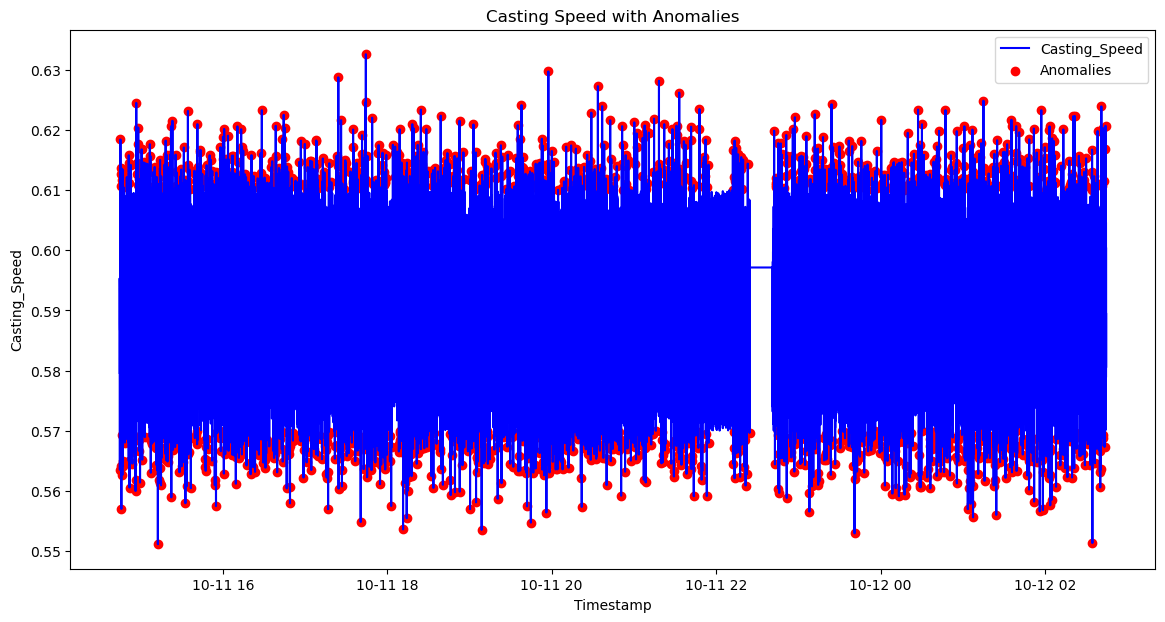

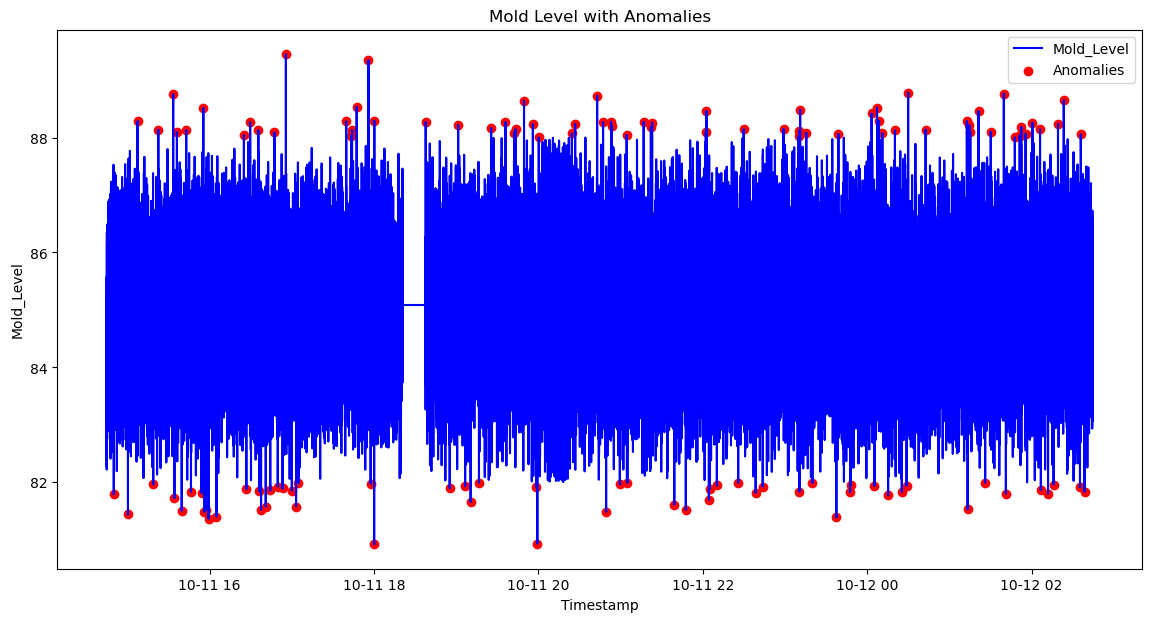

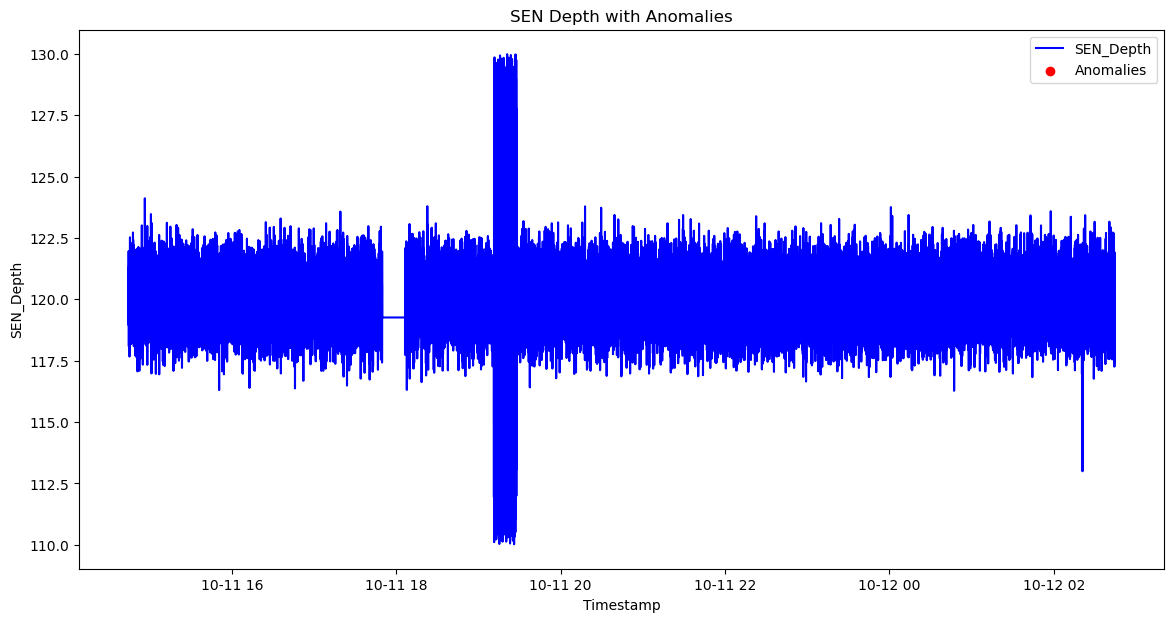

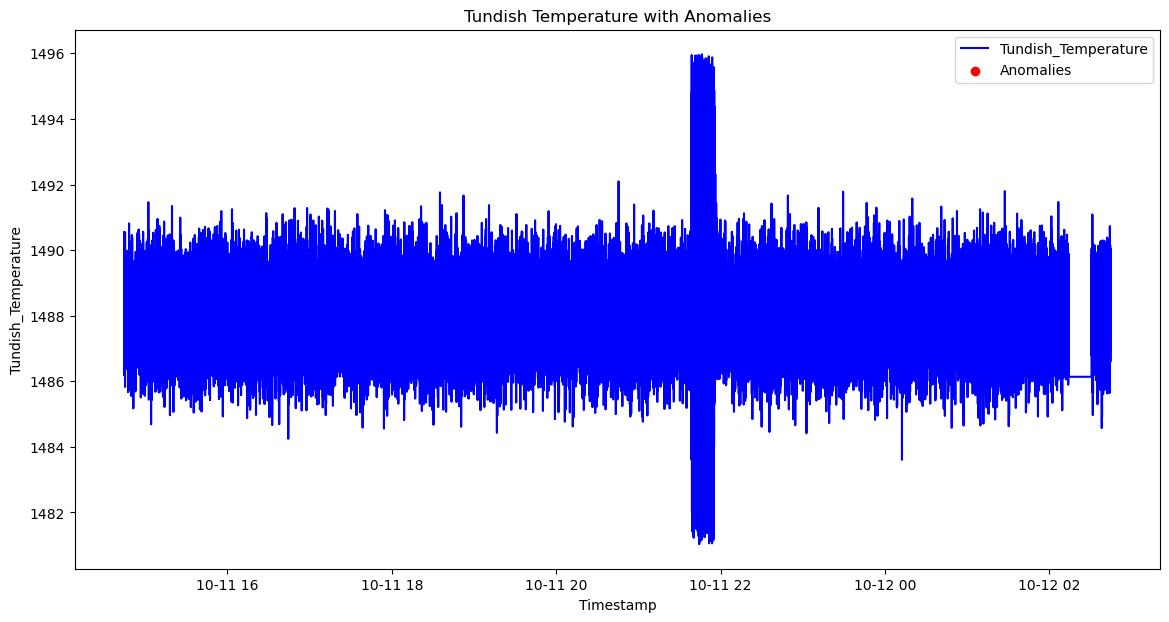

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv('data.csv', parse_dates=['Timestamp'])

# Function to plot time series data with anomalies
def plot_time_series_with_anomalies(df, variable, title):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Timestamp'], df[variable], label=variable, color='blue')
    
    # Highlight anomalies
    anomalies = df[(df[variable] < ranges[variable][0]) | (df[variable] > ranges[variable][1])]
    plt.scatter(anomalies['Timestamp'], anomalies[variable], color='red', label='Anomalies')
    
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel(variable)
    plt.legend()
    plt.show()

# Define the ranges for anomalies
ranges = {
    'Casting_Speed': (0.57, 0.61),
    'Mold_Level': (82, 88),
    'SEN_Depth': (110, 130),
    'Tundish_Temperature': (1481, 1496)
}

# Plot each variable with anomalies
plot_time_series_with_anomalies(df, 'Casting_Speed', 'Casting Speed with Anomalies')
plot_time_series_with_anomalies(df, 'Mold_Level', 'Mold Level with Anomalies')
plot_time_series_with_anomalies(df, 'SEN_Depth', 'SEN Depth with Anomalies')
plot_time_series_with_anomalies(df, 'Tundish_Temperature', 'Tundish Temperature with Anomalies')
